<a href="https://colab.research.google.com/github/tylereriksen/PersonalProjects/blob/main/Linear_Regression_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will look to show the Kepler's Third Law. We will do this by linear regression on a dataset of known planets, dwarf planets, and objects from a given dataset (which will contain a subset of all known intrasolar objects to train and test data with). We will be finding the line for the linear regression without using the SKLearn package and with it to see the differences in output.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Make the data set of the planetary values for distance from sun and orbital duration

In [ ]:
d = {'Planet/Dwarf Planet/Object':['Mercury', 'Venus', 'Earth', 'Mars', 'Ceres', 'Jupiter', 'Saturn', 'Uranus', 'Neptune'], 
     'Average Distance From Sun (Millions of Miles)':[33.39, 67.641, 93.581, 131.09, 257.326, 462.29, 918.33, 1831.3, 2780.3], 
     'Orbital Revolution Duration (Earth years)':[0.241, 0.616, 1, 1.881, 4.6051, 11.862, 29.4571, 84.0205, 164.8]}

df = pd.DataFrame(data = d)
df

,Planet/Dwarf Planet/Object,Average Distance From Sun (Millions of Miles),Orbital Revolution Duration (Earth years)
0,Mercury,33.390,0.2410
1,Venus,67.641,0.6160
2,Earth,93.581,1.0000
3,Mars,131.090,1.8810
4,Ceres,257.326,4.6051
5,Jupiter,462.290,11.8620
6,Saturn,918.330,29.4571
7,Uranus,1831.300,84.0205
8,Neptune,2780.300,164.8000


We will now transform the data into the proper form we want to do our linear regression.

In [ ]:
# list of the planet's distances from sun cubed divided by 100000 for easier representation and comparison with the Y-set
X = [(1/100000) * x ** 3 for x in list(df['Average Distance From Sun (Millions of Miles)'])]
# list of the planet's orbital years squared
Y = [y ** 2 for y in list(df['Orbital Revolution Duration (Earth years)'])]
X, Y

([0.3722624721900001,
  3.094781974557211,
  8.19526582641941,
  22.527276540290003,
  170.39270895441982,
  987.9694086698903,
  7744.552287065372,
  61415.569902970004,
  214919.08310627003],
 [0.058080999999999994,
  0.379456,
  1.0,
  3.538161,
  21.206946010000003,
  140.707044,
  867.7207404100001,
  7059.44442025,
  27159.040000000005])

Graph of the above data to show that a trend can be generally seen and that a linear regression would suffice for this.

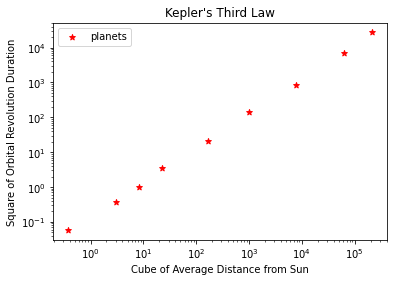

In [ ]:
plt.scatter(X, Y, label= "planets", color= "red",
            marker= "*")
plt.xscale("log")
plt.xlabel('Cube of Average Distance from Sun')
plt.yscale("log")
plt.ylabel('Square of Orbital Revolution Duration')
plt.title('Kepler\'s Third Law')
plt.legend()
plt.show()

We can calculate the slope of the linear regression line by calculating the following sums: $m = \frac{\sum (x-x_i)(y-y_i)}{\sum (x-x_i)^2}$. $x_i$ is equal to the average of the $x$ values and $y_i$ is equal to the average of the $y$ values. We can then use this to find our y-intercept and get the equation for our linear regression line as $y = mx + b$.

In [ ]:
# finding the averages of the X and Y
xi = sum(X) / len(X)
yi = sum(Y) / len(Y)

# table and data for the datatable for calculations
xData = {'x': [i for i in X],
         'y': [i for i in Y],
         'x-xi': [i - xi for i in X],
         'y-yi': [i - yi for i in Y],
         '(x-xi)^2': [(i - xi) ** 2 for i in X],
         '(x-xi)(y-yi)': [(X[i] - xi) * (Y[i] - yi) for i in range(len(X))]}
yData = pd.DataFrame(data = xData)
print(yData)

# finding the slope and intercept based on the calculations
slope = float(sum(yData[yData.columns[-1]]) / sum(yData[yData.columns[-2]]))
intercept = yi - slope * xi
print("From this data, we can conclude that the slope is %f and the intercept is %f" %(slope, intercept))

               x             y           x-xi          y-yi      (x-xi)^2  \
0       0.372262      0.058081  -31696.489626  -3916.952458  1.004667e+09   
1       3.094782      0.379456  -31693.767107  -3916.631083  1.004495e+09   
2       8.195266      1.000000  -31688.666623  -3916.010539  1.004172e+09   
3      22.527277      3.538161  -31674.334612  -3913.472378  1.003263e+09   
4     170.392709     21.206946  -31526.469180  -3895.803593  9.939183e+08   
5     987.969409    140.707044  -30708.892480  -3776.303495  9.430361e+08   
6    7744.552287    867.720740  -23952.309602  -3049.289798  5.737131e+08   
7   61415.569903   7059.444420   29718.708014   3142.433882  8.832016e+08   
8  214919.083106  27159.040000  183222.221217  23242.029461  3.357038e+10   

   (x-xi)(y-yi)  
0  1.241536e+08  
1  1.241328e+08  
2  1.240932e+08  
3  1.239566e+08  
4  1.228209e+08  
5  1.159661e+08  
6  7.303753e+07  
7  9.338907e+07  
8  4.258456e+09  
From this data, we can conclude that the slope is

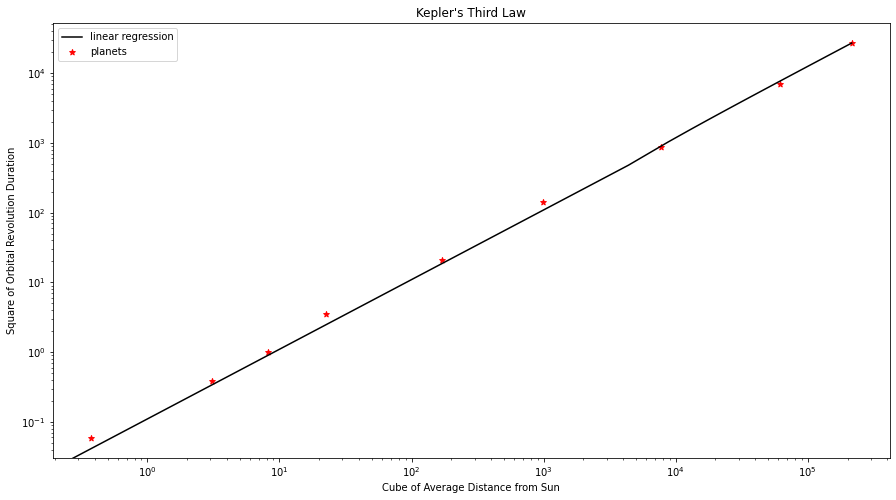

In [ ]:
# graph of the data points along with the linear regression line
plt.figure(figsize = (15, 8))
plt.scatter(X, Y, label= "planets", color= "red",
            marker= "*")
a = np.linspace(0, max(X))
plt.plot(a, a * slope + intercept, label = "linear regression", color = "black")
plt.xscale("log")
plt.xlabel('Cube of Average Distance from Sun')
plt.yscale("log")
plt.ylabel('Square of Orbital Revolution Duration')
plt.title('Kepler\'s Third Law')
plt.legend()
plt.show()